<a href="https://colab.research.google.com/github/engcivilgabriel/Projects/blob/master/An%C3%A1lise_da_Viol%C3%AAncia_no_Rio_de_Janeirob_entre_1991_e_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://github.com/engcivilgabriel/Projects/blob/master/Logo.png?raw=true)

# **Analisando a Violência no Rio de Janeiro**

Com as atuais medidas de isolamento social motivadas pelo novo coronavírus, seria razoável prever uma diminuição da criminalidade no Brasil. Todavia, a realidade tem se mostrado diferente, os meios midiáticos vem noticiando um aumento considerável nos homicidios dolosos (intencionais) em comparação com os dois últimos anos (2018-2019).

Considerando este cenário, vamos analisar a situação da violência no Rio de Janeiro entre os anos de 1991 e 2019. **Iremos, assim, nos aprofundar nos dados referentes a este Estado, e ver quais insights podem ser extraídos a partir de dados brutos.**

Importa mencionar que o Rio de Janeiro não foi escolhido para esta análise de forma aleatória, as leis de acesso à informação e a conscientização dos órgãos públicos, vêm proporcionando a disponibilização de várias fontes de dados. Como exemplo, o governo do Rio de Janeiro traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/).


## **Obtenção dos Dados**


Como mencionada, os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv).

### **Importando os dados**

Iniciaremos a exploração dos dados baixando apenas o seguinte arquivo:

* `violencia_rio.csv`

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importar o arquivo violencia_rio.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Análise Inicial dos Dados



### **Dimensionamento do volume de dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados. 

Deste modo, vamos verificar qual o volume de dados que o nosso *DataFrame* apresenta:


In [3]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 344
Variáveis:	 56



Estas variáveis são descritas da seguinte forma:

In [4]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

###**Dicionário das variáveis**

* `id` - número de id gerado para identificar a entrada de dados
* `vano` - ano do registro
* `mes` - mes do registro
* `hom_doloso` - número de casos de homicidios dolosos
* `lesao_corp_morte` - número de casos com lesão corporal que ocasionaram morte
* `latrocinio	` - número de casos de latrocinio
* `hom_por_interv_policial` - número de casos de homicidio por intervenção policial
* `tentat_hom` - número de casos de tentativa de homicidio
* `lesao_corp_dolosa` - número de casos com lesão corporal dolosas
* `estupro` - número de casos de estupro
* `hom_culposo` - número de casos de homicidio culposo
* `lesao_corp_culposa` - número de casos de lesão corporal culposa
* `roubo_comercio` - número de casos de roubo ao comércio
* `roubo_residencia` - número de casos de roubo a residência
* `roubo_veiculo` - número de casos de roubo a veículo
* `roubo_carga` - número de casos de roubo de carga
* `roubo_transeunte` - número de casos de roubo a transeunte
* `roubo_em_coletivo` - número de casos de roubo em transporte coletivo
* `roubo_banco` - número de casos de roubo a banco
* `roubo_cx_eletronico` - número de casos de roubo a caixa eletrônico
* `roubo_celular` - número de casos de roubo a celular
* `roubo_conducao_saque` - número de casos de roubo com condução a saque
* `roubo_apos_saque` - número de casos de roubo após saque
* `roubo_bicicleta` - número de casos de roubo de bicicleta
* `outros_roubos` - número de casos de roubo de outro tipo
* `total_roubos` - número total de roubos
* `furto_veiculos` - número de casos de furto de veículo
* `furto_transeunte` - número de casos de furto a transeunte
* `furto_coletivo` - número de casos de furto em transporte coletivo
* `furto_celular` - número de casos de furto de celular
* `furto_bicicleta` - número de casos de furto de bicicleta
* `outros_furtos` - número de casos de outros furtos
* `total_furtos` - número total de furtos
* `sequestro` - número de casos de sequestro
* `extorsao` - número de casos de extorsão
* `sequestro_relampago` - número de casos de sequestro relâmpago
* `estelionato` - número de casos de estelionato
* `apreensao_drogas` - número de casos de apreensão de drogas
* `posse_drogas` - número de casos de posse de drogas
* `trafico_drogas` - número de casos de tráfico de drogas
* `apreensao_drogas_sem_autor` - número de casos de apreensão de drogas sem autorização
* `recuperacao_veiculos` - número de casos de recuperação de veículo
* `apf` - número de casos de auto de prisão em flagrante
* `aaapai` - número de casos de auto de apreensão de adolescente por ato infracional
* `cmp` - 
* `cmba` - 
* `ameaca` - número de casos de ameaças
* `pessoas_desaparecidas` - número de casos de pessoa desaparecida
* `encontro_cadaver` - número de casos de encontro de cadáver
* `encontro_ossada` - número de casos de encontro de ossada
* `pol_militares_mortos_serv` - número de casos de morte de policial militar em serviço
* `pol_civis_mortos_serv` - número de casos de morte de policial civil em serviço
* `indicador_letalidade` - indicador de letalidade
* `indicador_roubo_rua` - indicador de roubo na rua
* `indicador_roubo_veic` - indicador de roubo de veículo
* `registro_ocorrencias` - número de casos de registro de ocorrencia
* `fase` - fase



Tão logo, podemos averiguar também que tais variáveis apresentam as seguintes tipologias:

In [5]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Agora, antes de iniciarmos a análise propriamente dita, vamos verificar a aparência do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


###**Qual a porcentagem de valores ausentes no dataset?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [17]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Fica evidente assim que **há muitos dados faltantes!**

## Informações Estatísticas da Violência no Rio de Janeiro

Bem, apesar de constatarmos a ausência de muitos dados, ainda é possível averiguar a qualidade estatística do *Dataset*  para aquelas variáveis que não apresentam dados ausentes. Assim, possivelmente, poderemos extrair algumas informações relevantes.

Para isso, vamos iniciar este procedimento imprimindo um relatório estatístico do *DataFrame* para todos os seus itens componentes:



In [8]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

###**Histograma para as variáveis numéricas**

Objetivando identificar a distribuição das variáveis, irei plotar o histograma das variáveis numéricas.


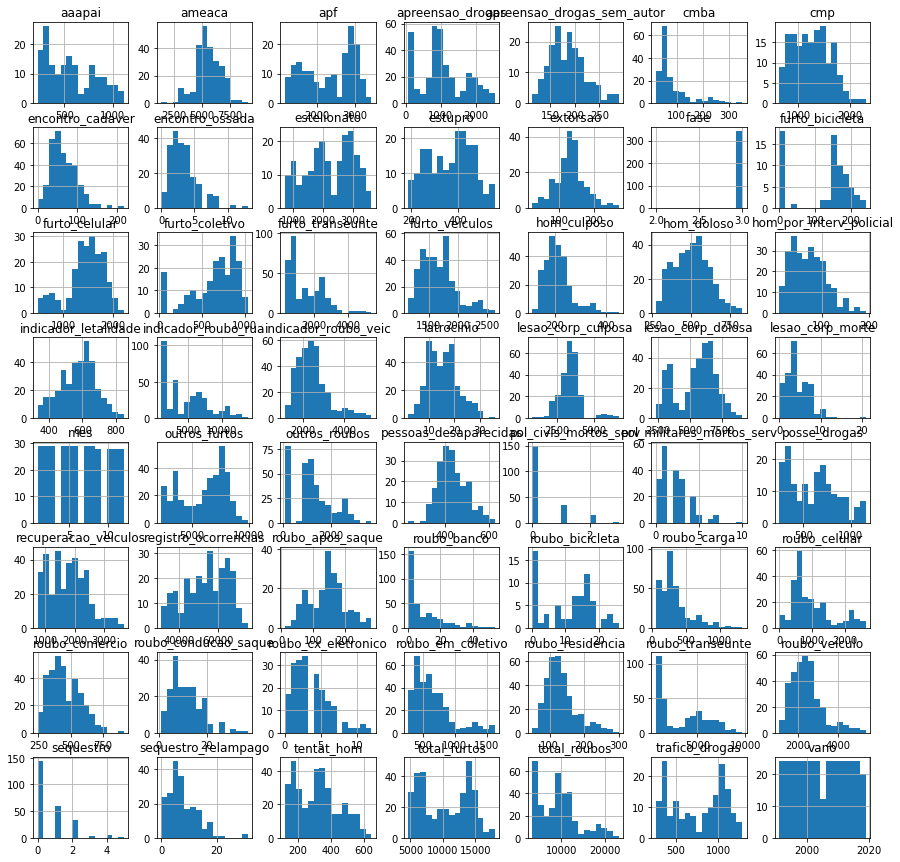

In [10]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,15));

Vamos agora direcionar nosso estudo para casos relacionados a veículos, por isso iremos analisar algumas variáveis especificas **sem dados ausentes**, como `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`.

In [14]:
df[['roubo_veiculo','furto_veiculos','recuperacao_veiculos']].describe()

,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,344.000000,344.000000,344.000000
mean,2448.697674,1674.671512,1772.238372
std,789.689559,294.852020,656.761843
min,1097.000000,1159.000000,729.000000
25%,1889.750000,1430.500000,1276.750000
50%,2322.000000,1637.500000,1755.000000
75%,2778.000000,1833.250000,2202.000000
max,5358.000000,2630.000000,3695.000000


###**Boxplot para as variáveis `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`**

Com a plotagem dos bloxplots poderemos averiguar visualmente a distribuição estatística destas variáveis e constatar a existência de *outliers*. 

Nossa análise verificará qual a porcentagem de dados destas variáveis supera o valor do quartil de 75%.

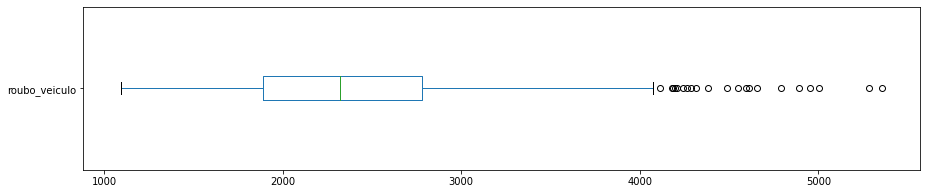

roubo_veiculo: valores acima de 2778:
86 entradas
25.0000%


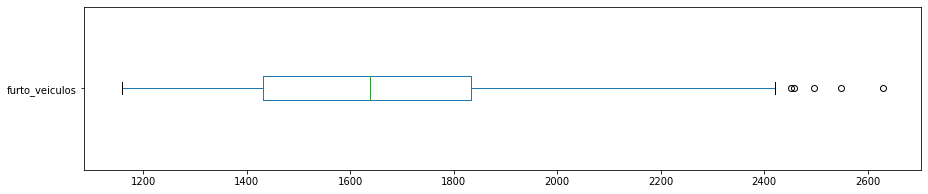

furto_veiculos: valores acima de 1834:
85 entradas
24.7093%


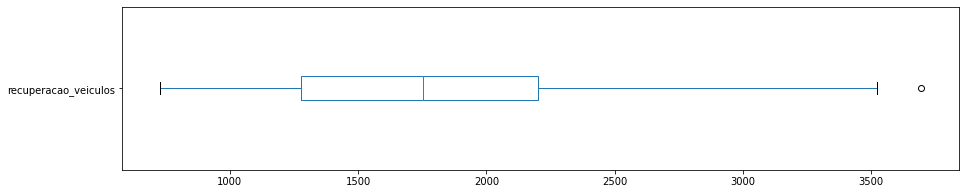

recuperacao_veiculos: valores acima de 2202:
86 entradas
25.0000%


In [22]:
# roubo_veiculo
df.roubo_veiculo.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 2778 casos para roubo_veiculo
print("roubo_veiculo: valores acima de 2778:")
print("{} entradas".format(len(df[df.roubo_veiculo > 2778])))
print("{:.4f}%".format((len(df[df.roubo_veiculo > 2778]) / df.shape[0])*100))

# furto_veiculos
df.furto_veiculos.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1834 casos para furto_veiculos
print("furto_veiculos: valores acima de 1834:")
print("{} entradas".format(len(df[df.furto_veiculos > 1834])))
print("{:.4f}%".format((len(df[df.furto_veiculos > 1834]) / df.shape[0])*100))

# recuperacao_veiculos
df.recuperacao_veiculos.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 2202 casos para recuperacao_veiculos
print("recuperacao_veiculos: valores acima de 2202:")
print("{} entradas".format(len(df[df.recuperacao_veiculos > 2202])))
print("{:.4f}%".format((len(df[df.recuperacao_veiculos > 2202]) / df.shape[0])*100))

Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `roubo_veiculo` possui 75% do valor abaixo de 2778, porém seu valor máximo é 5358.
* A variável `furto_veiculos` possui 75% do valor abaixo de 1833.25, porém seu valor máximo é 2630.
* A variável `recuperacao_veiculos` possui 75% do valor abaixo de 2202, porém seu valor máximo é 3695.

Logo, através da leitura das informações estatísticas, dos histogramas e dos boxplots confeccionados **fica clara a existência de *outliers* em suas respectivas distribições**. Portanto, já que identificamos *outliers* nas variáveis, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.



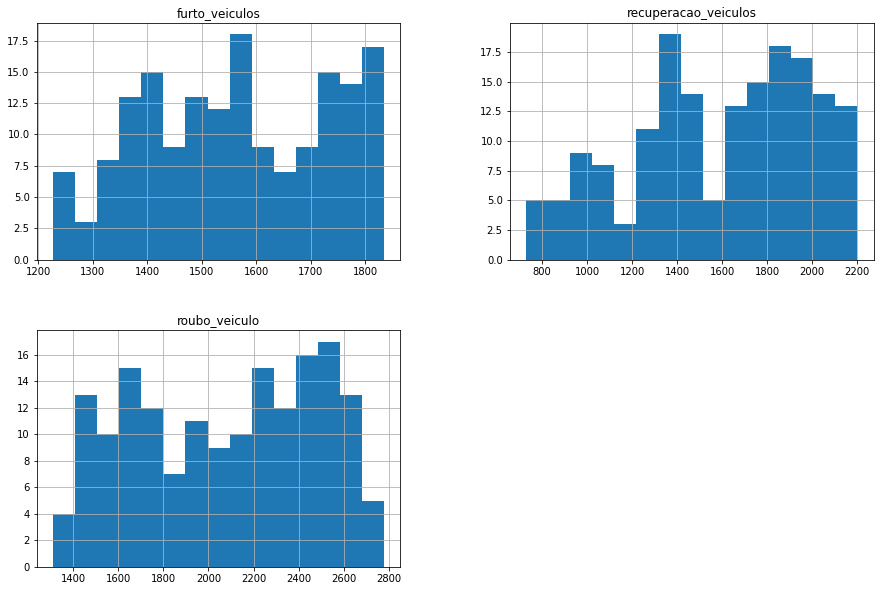

In [25]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.roubo_veiculo > 2778].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.furto_veiculos > 1834].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.recuperacao_veiculos > 2202].index, axis=0, inplace=True)

# remover demais variáveis
df_clean.drop(['vano','mes','hom_doloso','lesao_corp_morte','latrocinio','hom_por_interv_policial','tentat_hom','lesao_corp_dolosa','estupro','hom_culposo','lesao_corp_culposa','roubo_comercio','roubo_residencia','roubo_carga','roubo_transeunte','roubo_em_coletivo','roubo_banco','roubo_cx_eletronico','roubo_celular','roubo_conducao_saque','roubo_apos_saque','roubo_bicicleta','outros_roubos','total_roubos','furto_transeunte','furto_coletivo','furto_celular','furto_bicicleta','outros_furtos','total_furtos','sequestro','extorsao','sequestro_relampago','estelionato','apreensao_drogas','posse_drogas','trafico_drogas','apreensao_drogas_sem_autor','apf','aaapai','cmp','cmba','ameaca','pessoas_desaparecidas','encontro_cadaver','encontro_ossada','pol_militares_mortos_serv','pol_civis_mortos_serv','indicador_letalidade','indicador_roubo_rua','indicador_roubo_veic','registro_ocorrencias','fase'], axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Posto isto, analisaremos mais especificamente estas variáveis. Para isso, vamos calcular qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:

  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

In [29]:
# ver a porcentagem de carros recuperados em relação aos carros roubados + carros furtados
df_clean.recuperacao_veiculos.mean() / (df_clean.furto_veiculos.mean() + df_clean.roubo_veiculo.mean())

0.4365475639558013

Concluimos, assim, uma taxa de sucesso na recuperação de veículos de, aproximadamente, **44% dos casos**. O que é um dado preocupante, uma vez que veículos roubados e furtados estão diretamente envolvidos com a execução de outros crimes.

###**Visualização de Dados de variáveis aleatórias**

Vamos analisar variáveis aleatórias para tirarmos o veredito do nosso *Dataset*.

Para isso, vamos encontrar os valores máximos (`max`) e mínimos (`min`) da coluna `hom_doloso`.


In [32]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


Vamos então ver como fica a distribuição de dados desta variável em um histograma:


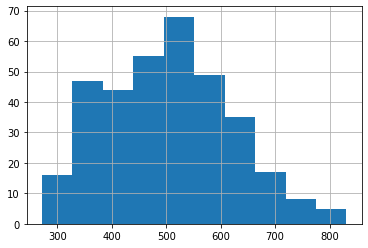

In [34]:
df.hom_doloso.hist();

Fica visivel pelo histograma que os dados da variável homicidios dolosos também apresentam outliers, mesmo sem plotarmos o boxplot, e que 75% dos casos se encontram próximos a média dos dados, o que indica, surpreendentemente, que os dados desta amostra são consistentes e podem ser fundamento para uma análise mais profunda.

Vamos agora ver como fica o Gráfico de linhas para a variável `roubo_em_coletivo`:

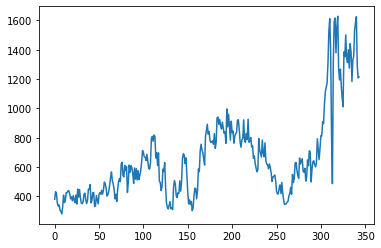

In [35]:
# plotar gráfico de linhas para roubo_em_coletivo
df.roubo_em_coletivo.plot();

Do gráfico de linhas, fica evidente a súbita elevação da variância dos dados superiores a 250 casos, o que já estava indicado pelo elevado desvio padrão desta variável e pelo notório distanciamento entre o 3º quartil (75%) e o valor máximo, **indicando que os roubos em transporte coletivo são sazonais**.

##**Conclusão**

Ficou claro que, por estarmos lidando com um dataset de dados reais, provindos de um portal de dados abertos, perdemos muitas informações pela ausencia de dados e presença de outliers. Contudo, apesar disso, ficou demonstrado que com um tratamento dos dados feito de forma preliminar, os mesmos se mostram consistentes e confiáveis, podendo sim servir para uma análise mais profunda.

Vale ressaltar que a etapa de aquisição, tratamento e exploração dos dados consumiu a maior parte do tempo de projeto, porém, foi a atenção a esta etapa que permitiu extrair algumas informações relevantes e que poderiam sim ajudar a diminuir a taxa de violência no Rio de Janeiro. 